<a href="https://colab.research.google.com/github/debarshee2004/parkease-test001/blob/main/Automatic_Number_Plate_Recognition_with_opencv_and_Easy_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Check Version of CUDA present in our System**

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## **2. Installing and Importing the Required Packages**

In [ ]:
!pip install easyocr

!pip install imutils

!pip install opencv-python-headless==4.1.2.30                # If you are using Local Machine Then use "pip install opencv-python"

!pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio==0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

     |████████████████████████████████| 63.6 MB 1.4 MB/s 
     |████████████████████████████████| 47.7 MB 92 kB/s 
     |████████████████████████████████| 21.8 MB 44.8 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.62
    Uninstalling opencv-python-headless-4.5.5.62:
      Successfully uninstalled opencv-python-headless-4.5.5.62
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     |██████████████▋                 | 834.1 MB 1.7 MB/s eta 0:09:48tcmalloc: large alloc 1147494400 bytes == 0x56149f210000 @  0x7fe1c99d0615 0x5614656893bc 0x56146576a18a 0x56146568c1cd 0x56146577eb3d 0x561465700458 0x5614656fb02f 0x56146568daba 0x5614657002c0 0x5614656fb02f 0x56146568daba 0x5614656fccd4 0x56146577f986 0x5614656fc350 0x56146577f986 0x5614656fc350 0x56146577f986 0x5614656fc350 0x56146568df19 0x5614656d1a79 0x56146568cb32 0x5614657001dd 0x5614656fb02f 0x56146568daba 0x5614656fccd4 0x5614656fb02f 0x56146

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## **3. Covert Colored Image into Grayscale Format**

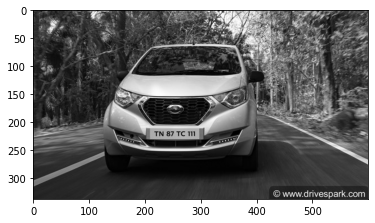

In [ ]:
img = cv2.imread('/content/demo image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## **4. Apply Filter and Edge Detection**

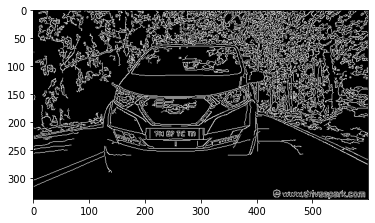

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## **5. Find Contours and Apply Mask**

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[202, 212]],

       [[296, 211]],

       [[297, 230]],

       [[204, 231]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

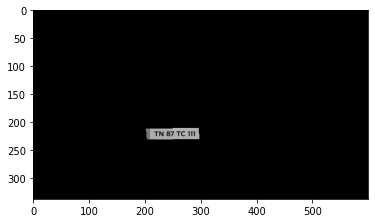

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

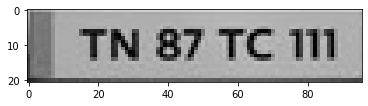

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


## **6. Use Easy OCR To Read Text**

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[15, 3], [93, 3], [93, 19], [15, 19]], 'TN 87 TC 111', 0.9245161595353233)]

## **7. Plot the Result**

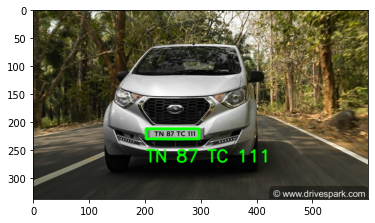

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))